In [1]:
import numpy as np
import pandas as pd 
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report , f1_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from skompiler import skompile

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load data and copy data called "df".
data = pd.read_csv("credit_risk_dataset.csv")
df = data.copy()
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Take base information about data .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# Check null values.
df.isnull().values.any()

True

In [5]:
# Total null values number . 
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# Descriptive statistics about data . 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


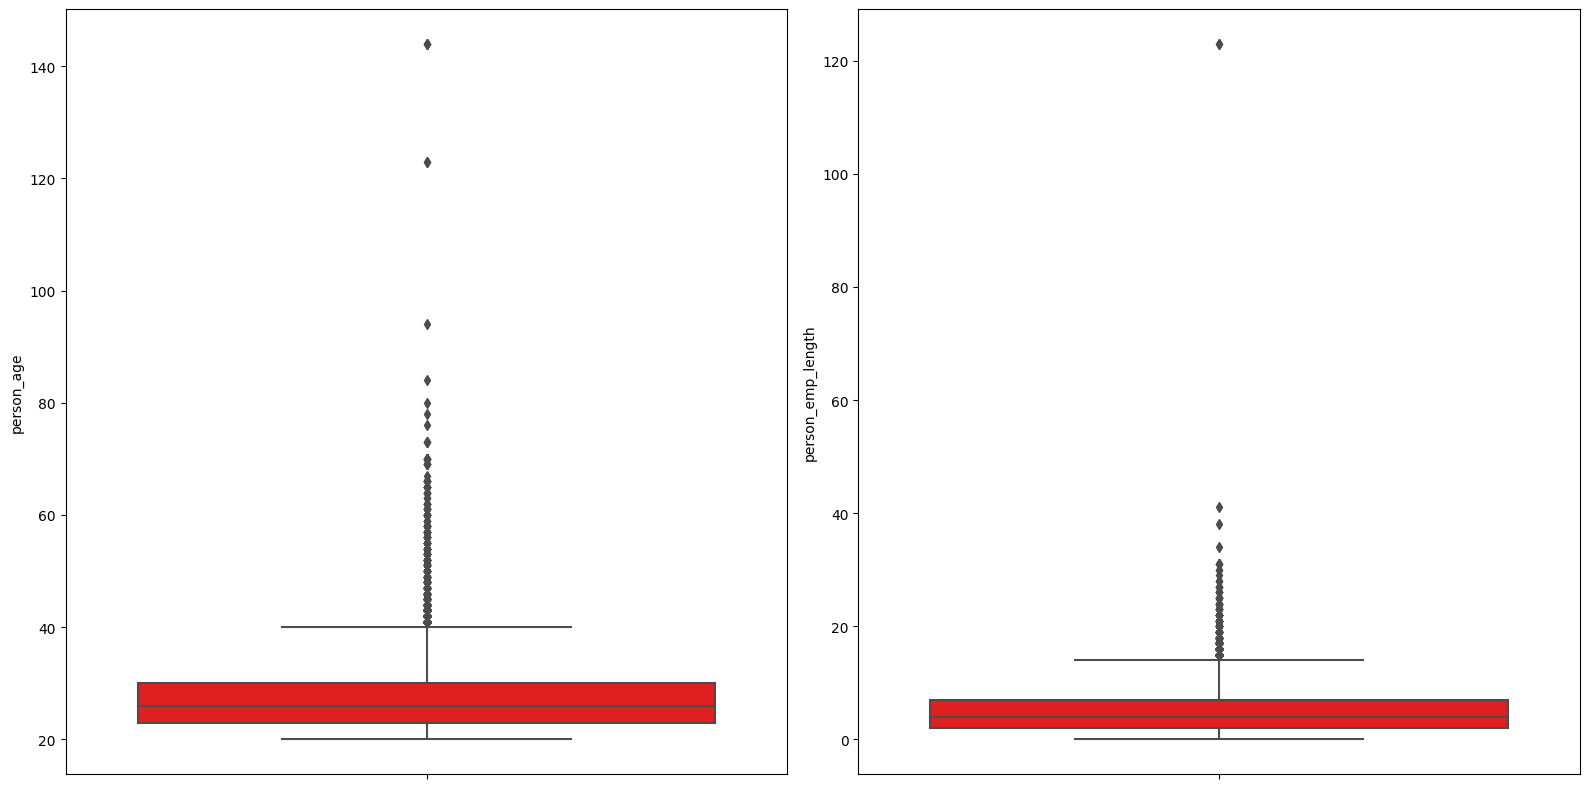

In [7]:
# Looking at the descriptive statistics, person age and person_emp length and see that the maximum is 144 and 123. These seem like outliers for everyday life. 
# I think we must look graphics about the features.

features = ['person_age', 'person_emp_length']

plt.figure(figsize=(16, 8))

for i in range(len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(data=df, y=features[i], color='red')
    plt.tight_layout()

plt.show()


In [8]:
# Calculating person_age data by age and sorting from oldest to youngest and look first 10 index.
df["person_age"].sort_values(ascending = False).head(10)

81       144
32297    144
183      144
747      123
575      123
32416     94
32506     84
32422     80
32355     78
32534     76
Name: person_age, dtype: int64

In [9]:
# Calculating person_emp_length data by age and sorting from oldest to youngest and look first 10 index.
df['person_emp_length'].sort_values(ascending=False).head(10)

0        123.0
210      123.0
32355     41.0
32515     38.0
32428     34.0
31866     31.0
32263     31.0
31867     31.0
30914     31.0
32562     30.0
Name: person_emp_length, dtype: float64

In [10]:
# First, remove values ​​that appear as outliers from the data set . 
df.drop(df.loc[df['person_emp_length'] == 123].index, inplace=True)

In [11]:
# First, remove values ​​that appear as outliers from the data set . 
df.drop(df.loc[df['person_age'] >= 123].index, inplace=True)

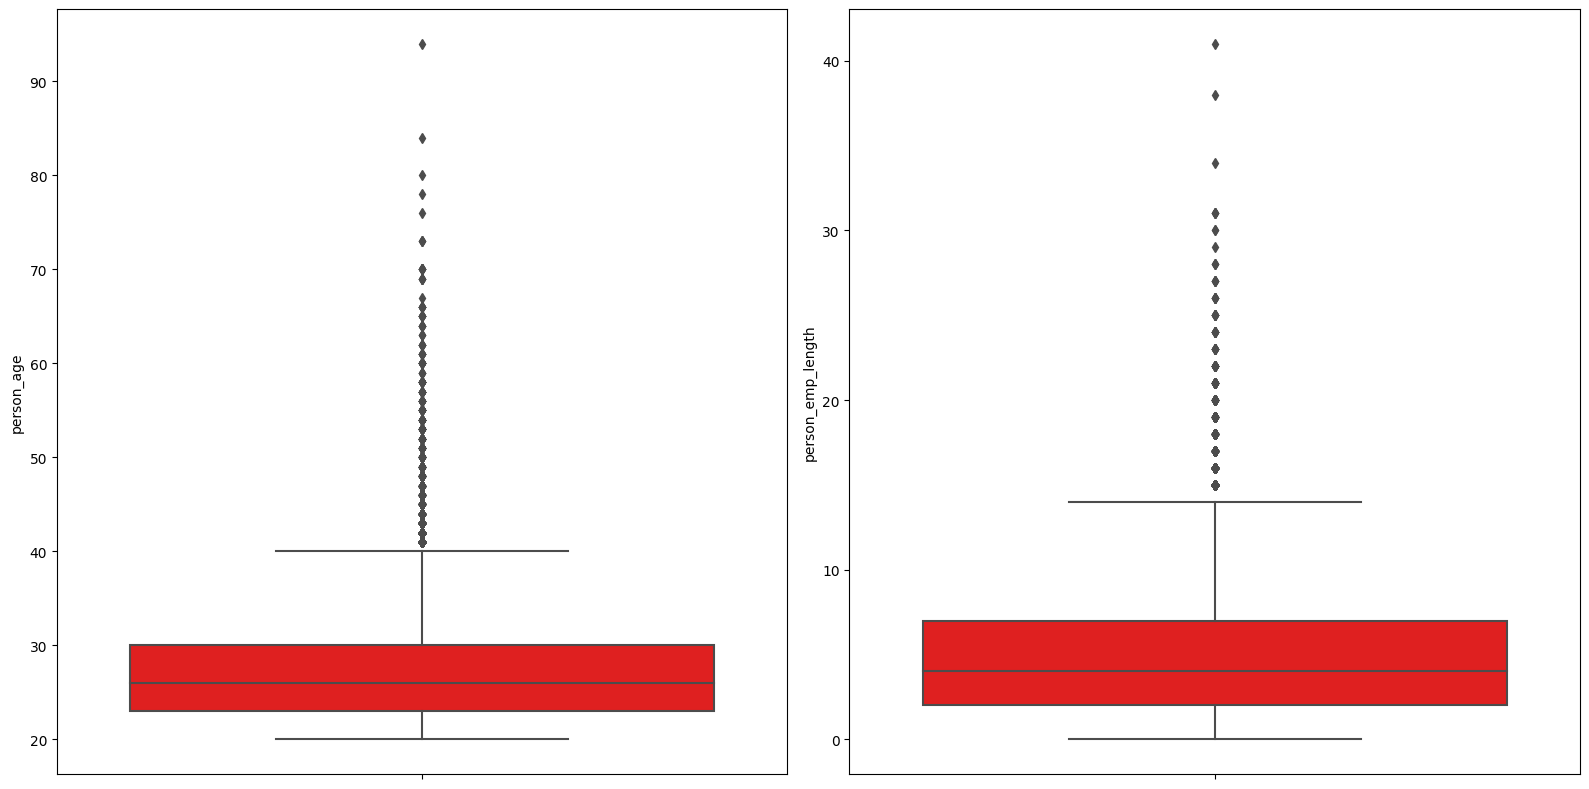

In [12]:
# Looking at the chart after outliers are removed .
features = ['person_age', 'person_emp_length']

plt.figure(figsize=(16, 8))

for i in range(len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(data=df, y=features[i], color='red')
    plt.tight_layout()

plt.show()

In [13]:
# Again control what are they null values ?
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
# After drop outliers
mean_person_emp_length = df['person_emp_length'].mean()
mean_loan_int_rate = df['loan_int_rate'].mean()

print("Mean Person Employee Length : " , mean_person_emp_length)
print("Mean Load Int Rate : " , mean_loan_int_rate)

Mean Person Employee Length :  4.782063827772341
Mean Load Int Rate :  11.01152856512441


In [15]:
# When I looked at the descriptive statistics in the person_emp_length column, I saw that the standard deviation was low. 
# Since the standard deviation would decrease even more after removing the outliers, I decided to fill in the empty spaces with the standard deviation.
df['person_emp_length'] = df['person_emp_length'].fillna(mean_person_emp_length) 

In [16]:
# # When I looked at the descriptive statistics in the loan_int_rate column, I saw that the standard deviation was low. 
# Since the standard deviation would decrease even more after removing the outliers, I decided to fill in the empty spaces with the standard deviation.
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_loan_int_rate) 

In [17]:
# Control 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [18]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [19]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

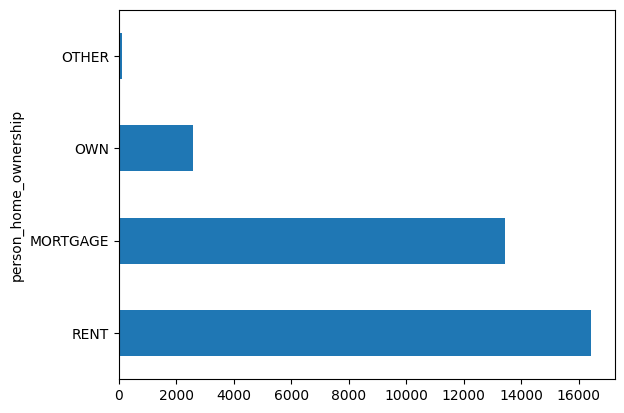

In [20]:
# This graphics show calculated numbers of home ownership . 
df['person_home_ownership'].value_counts().plot.barh() ; 

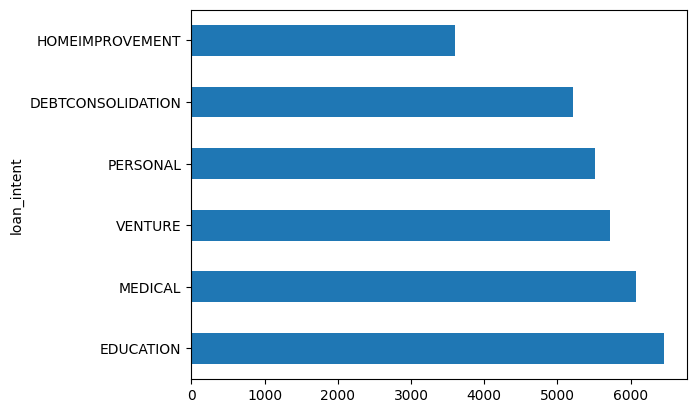

In [21]:
# This graphics show calculated numbers of loan intent .
df['loan_intent'].value_counts().plot.barh() ; 

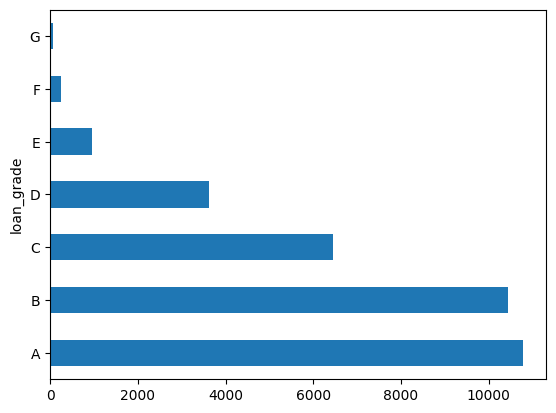

In [22]:
# This graphics show calculated numbers of loan grade .
df['loan_grade'].value_counts().plot.barh() ; 

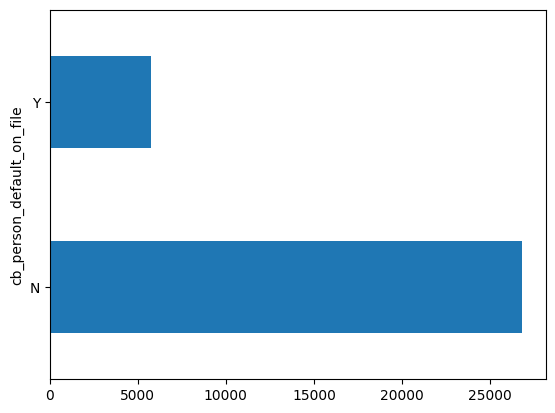

In [23]:
# This graphics show calculated numbers of historical default  .
df['cb_person_default_on_file'].value_counts().plot.barh() ; 

In [24]:
# There are 4 categorical variables . I use label encoder and I transform this categorical variables to continous variables.
categorical_variables = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()

df[categorical_variables] = df[categorical_variables].apply(label_encoder.fit_transform)

In [25]:
df["loan_status"].value_counts()


loan_status
0    25467
1     7107
Name: count, dtype: int64

In [26]:
# Control
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  int32  
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  int32  
 5   loan_grade                  32574 non-null  int32  
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  int32  
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.7 MB


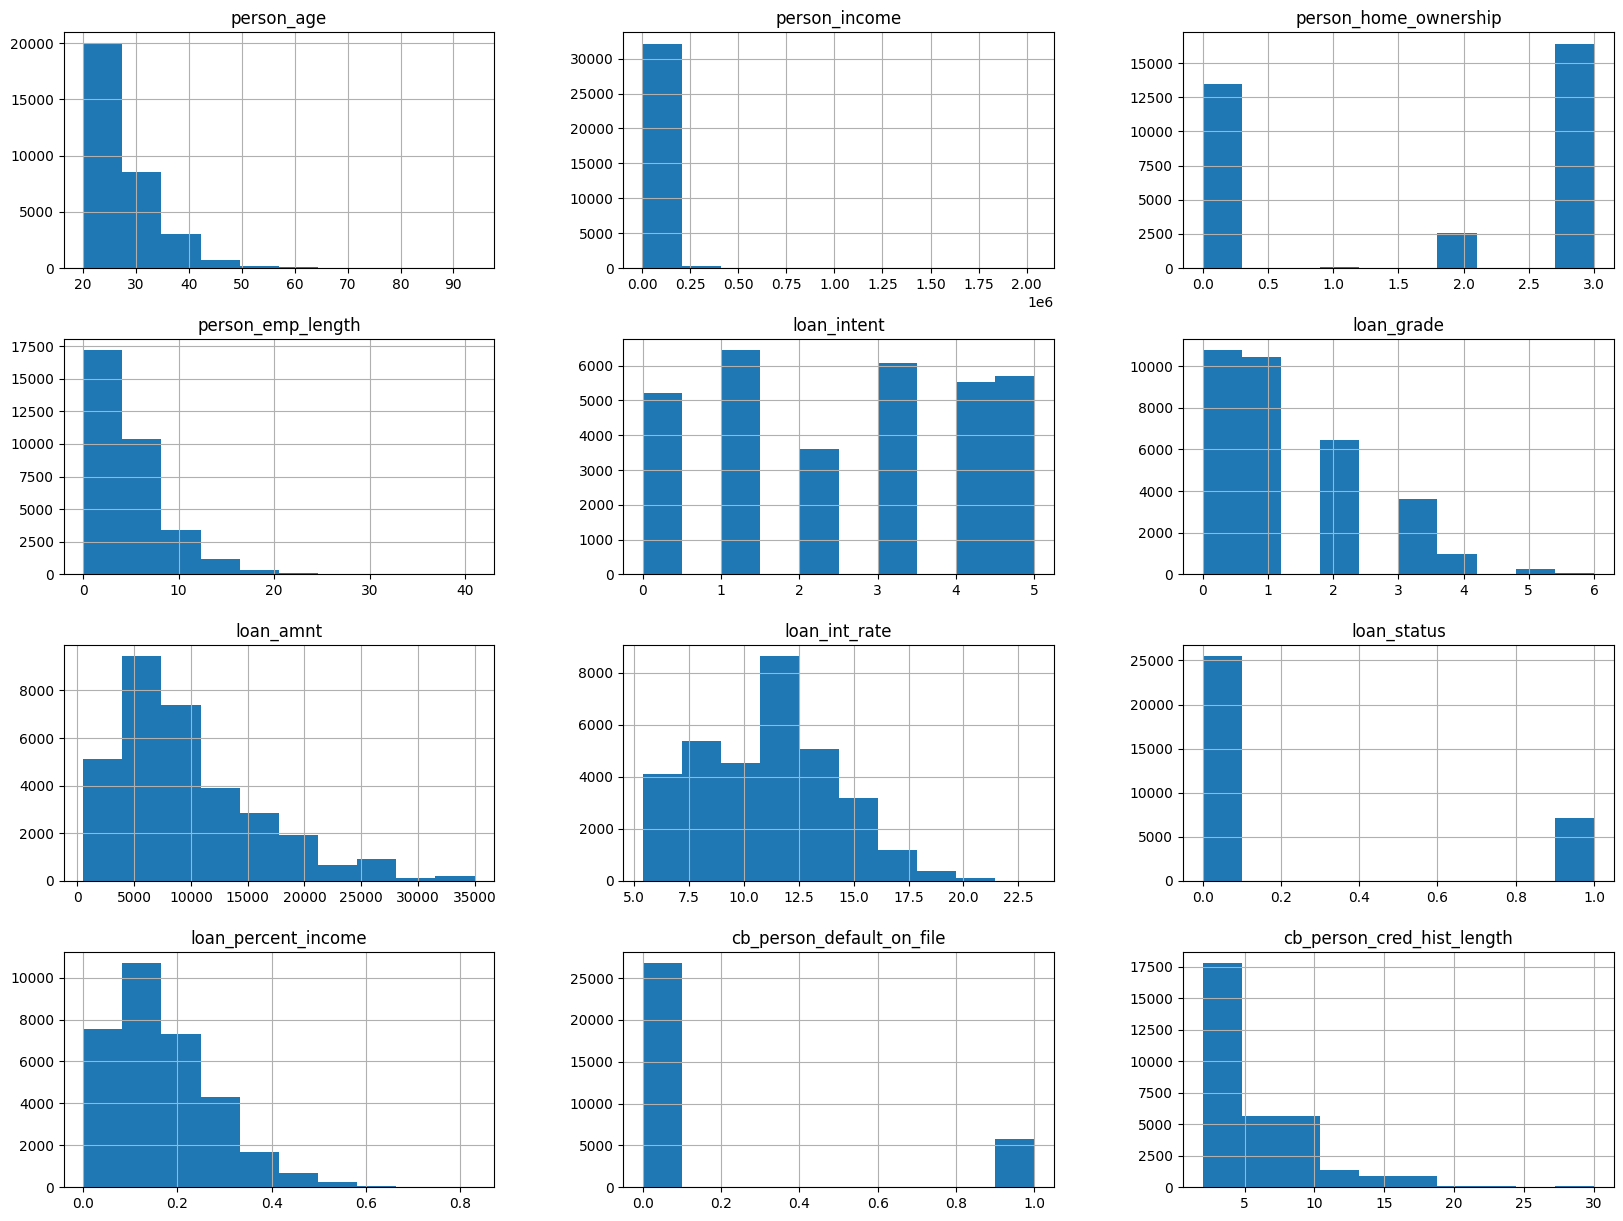

In [27]:
# Histogram graphics of all variables.
df.hist(figsize = (20,15))
plt.show()

In [28]:
df["Ratio of Age to Income"] = df["person_age"] / df["person_income"]

In [29]:
df['Ratio of Loan Amount to Age'] = df["loan_amnt"] / df["person_age"]

In [30]:
df['Ratio'] = (df["loan_amnt"] * df['loan_int_rate']) / df['person_income']

In [31]:
df["Ratio of Grade to Amount"] = df["loan_grade"] / df["loan_amnt"] 

In [32]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'Ratio of Age to Income', 'Ratio of Loan Amount to Age', 'Ratio',
       'Ratio of Grade to Amount'],
      dtype='object')

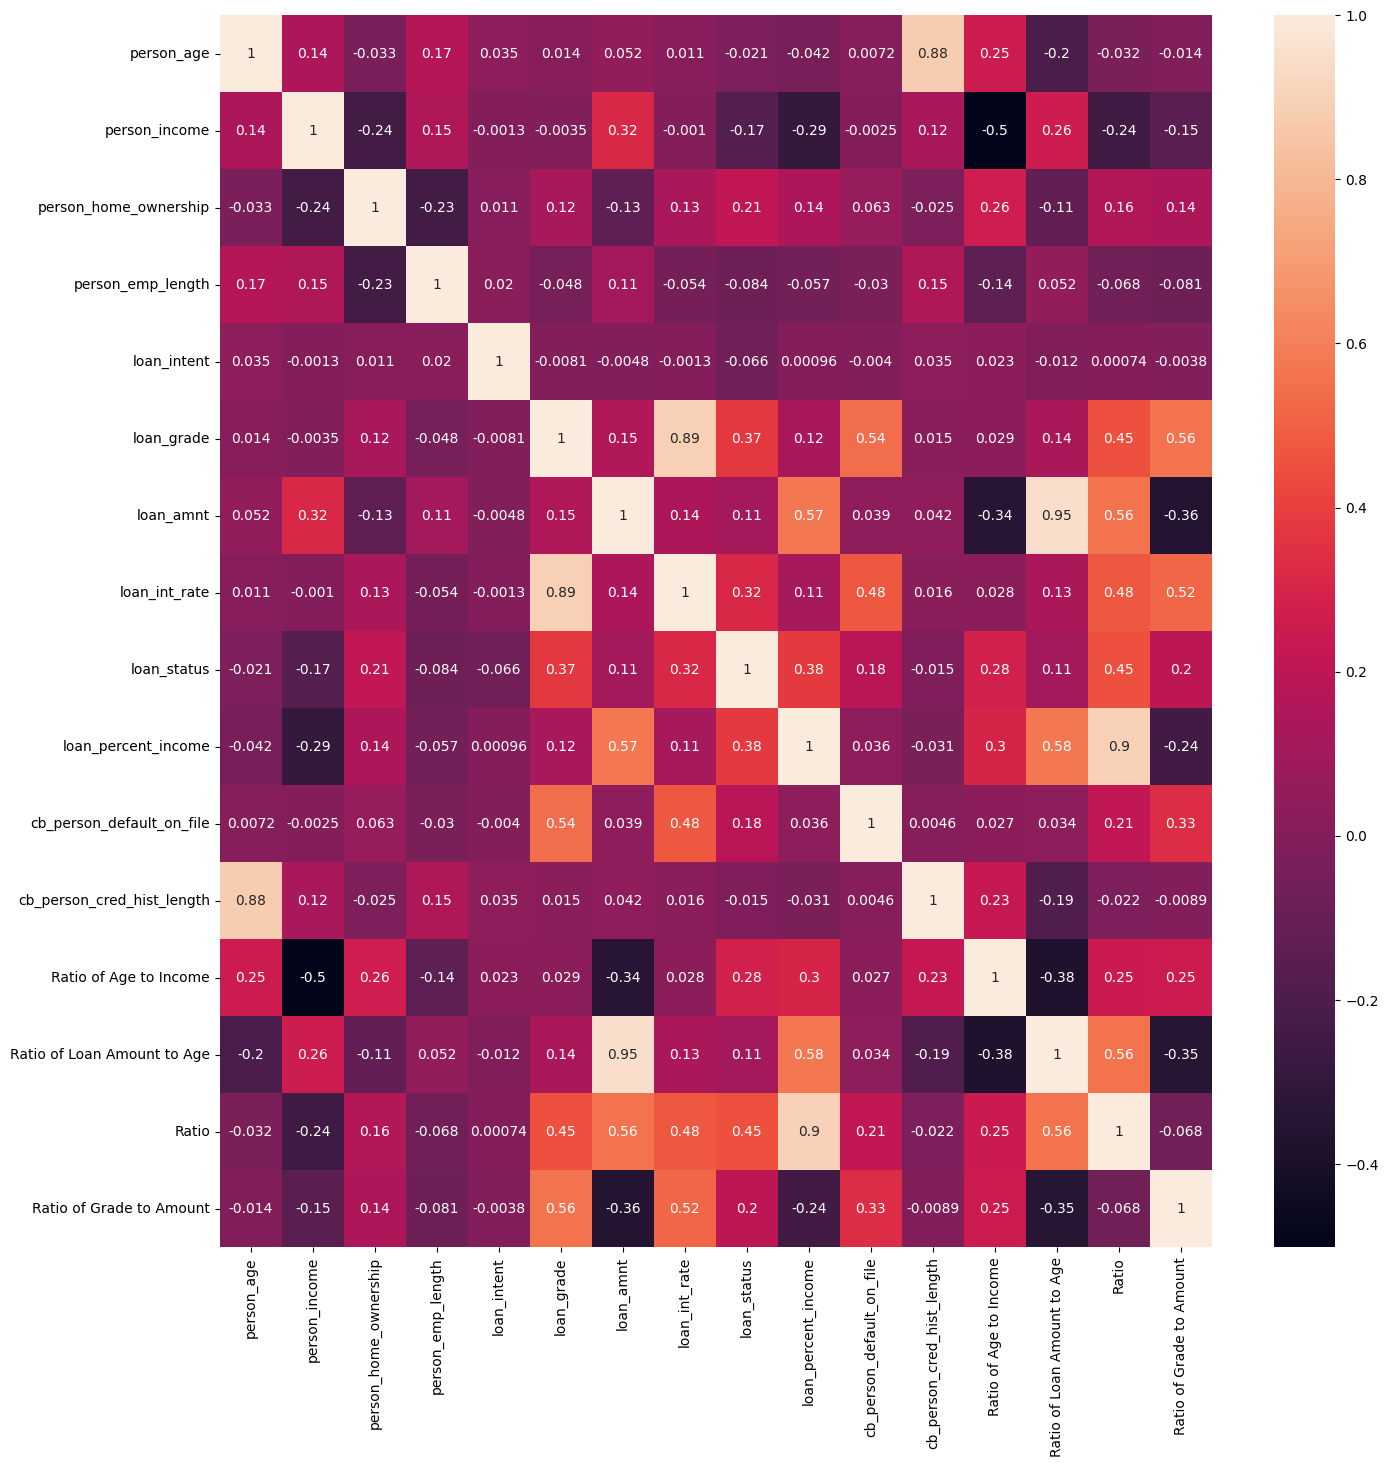

In [33]:
heat_map_continuous = df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(heat_map_continuous, annot=True)
plt.show()


In [34]:
# Train - test split data . I select test_size = 0.20 
y = df["loan_status"]
X = df.drop(["loan_status"] , axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42)

In [35]:
X_train.shape

(26059, 15)

In [36]:
y_train.shape

(26059,)

In [37]:
# Synthetic data - I wanted to prevent unbalanced data in the training dataset.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [38]:
X_resampled[0:5]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Ratio of Age to Income,Ratio of Loan Amount to Age,Ratio,Ratio of Grade to Amount
0,23,100000,0,5.0,0,2,15000,11.340000,0.15,1,2,0.000230,652.173913,1.701000,0.000133
1,27,130000,2,12.0,5,1,21000,11.011529,0.16,0,9,0.000208,777.777778,1.778785,0.000048
2,27,45150,3,1.0,5,2,18000,13.160000,0.40,0,7,0.000598,666.666667,5.246512,0.000111
3,22,28000,3,6.0,2,1,1000,10.250000,0.04,0,4,0.000786,45.454545,0.366071,0.001000
4,22,55000,3,3.0,5,0,7000,6.910000,0.13,0,4,0.000400,318.181818,0.879455,0.000000


In [39]:
y_resampled.shape

(40736,)

In [40]:
# Control
y_resampled.shape

(40736,)

# Logistic Regression

In [41]:
# Setup Logistic Regression model 
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_resampled, y_resampled)

In [42]:
# Control
loj_model

LogisticRegression(solver='liblinear')

In [43]:
# Intercept of Logistic Regression model
loj_model.intercept_

array([-0.00205438])

In [44]:
# Coefficients of Logistic Regression model
loj_model.coef_

array([[-7.22757427e-02, -2.50119922e-05,  5.36883925e-02,
        -3.49316856e-02, -1.17473716e-01,  9.27759624e-02,
         3.29115592e-04,  2.48703918e-01,  5.78208239e-03,
        -6.66058794e-03, -4.01038322e-02,  3.14414557e-05,
        -6.95220124e-03,  1.05087593e-01,  2.58528298e-05]])

In [45]:
# Prediction 
y_pred = loj_model.predict(X_test)

In [46]:
confusion_matrix(y_test , y_pred)

array([[3679, 1420],
       [ 350, 1066]], dtype=int64)

In [47]:
# Score of Logistic Regression Model
loj_model_accuracy = accuracy_score(y_test , y_pred)
loj_model_accuracy

0.72831926323868

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      5099
           1       0.43      0.75      0.55      1416

    accuracy                           0.73      6515
   macro avg       0.67      0.74      0.68      6515
weighted avg       0.81      0.73      0.75      6515



In [49]:
loj_model_f1 = f1_score(y_test , y_pred)

# Gaussian Naive Bayes

In [50]:
# Setup Gaussian Naive Bayes model and control
nb = GaussianNB()
nb_model = nb.fit(X_resampled, y_resampled)
nb_model

GaussianNB()

In [51]:
nb_model.predict(X_test)[0:20]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [52]:
# Prediction
y_pred = nb_model.predict(X_test)

In [53]:
# Score of Gaussian Naive Bayes
nb_model_accuracy = accuracy_score(y_test , y_pred)
nb_model_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)


              precision    recall  f1-score   support

           0       0.90      0.71      0.80      5099
           1       0.41      0.71      0.52      1416

    accuracy                           0.71      6515
   macro avg       0.65      0.71      0.66      6515
weighted avg       0.79      0.71      0.74      6515



array([[3641, 1458],
       [ 404, 1012]], dtype=int64)

In [54]:
nb_model_f1 = f1_score(y_test , y_pred)

# KNN

In [55]:
# Setup KNN model and control
knn = KNeighborsClassifier()
knn_model = knn.fit(X_resampled, y_resampled)
knn_model

KNeighborsClassifier()

In [56]:
y_pred = knn_model.predict(X_test)

In [57]:
# First score of KNN model
knn_model_accuracy = accuracy_score(y_test , y_pred)
knn_model_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      5099
           1       0.49      0.69      0.58      1416

    accuracy                           0.78      6515
   macro avg       0.70      0.75      0.71      6515
weighted avg       0.81      0.78      0.79      6515



array([[4080, 1019],
       [ 433,  983]], dtype=int64)

## Model Tuning

In [58]:
# This is hyparparameter find process . For KNN model , I want to "n_neighbors" value and I use CV method.
knn_params = {"n_neighbors" : np.arange(1,50)}

In [59]:
knn = KNeighborsClassifier()

In [60]:
# I use 10 layer CV .
knn_cv = GridSearchCV(knn , knn_params , cv = 10)

In [61]:
knn_cv.fit(X_resampled, y_resampled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [62]:
print("Best score:" + str(knn_cv.best_score_))
print("Best parameters: " + str(knn_cv.best_params_))

Best score:0.8593885629963042
Best parameters: {'n_neighbors': 1}


In [63]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(X_resampled, y_resampled)

In [64]:
y_pred = knn_tuned.predict(X_test)

In [65]:
knn_tuned_model_accuracy =  accuracy_score(y_test, y_pred)
knn_tuned_model_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5099
           1       0.53      0.62      0.57      1416

    accuracy                           0.80      6515
   macro avg       0.71      0.73      0.72      6515
weighted avg       0.81      0.80      0.80      6515



array([[4324,  775],
       [ 542,  874]], dtype=int64)

In [66]:
knn_tuned_f1 = f1_score(y_test , y_pred)

# MLP Classifier

This is a basic neural networks model with scikit-learn . Assigment doesn't include topics about deep learning frameworks but I want to try neural networks with scikit-learn.

In [67]:
# This line of code creates a "scaler" object to standardize the data features using the "StandardScaler."
scaler = StandardScaler()

In [68]:
scaler.fit(X_resampled, y_resampled)
X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [69]:
X_test_scaled[0:5]

array([[-0.41931027,  0.98591132, -1.33417038, -1.21402479,  0.42601435,
         0.52258141, -0.46057458,  0.3910905 , -1.05187634, -0.41686808,
        -0.93991982, -0.86061486, -0.3789975 , -0.93376825,  0.13373055],
       [ 0.26946149,  0.31623008, -1.33417038, -0.67849141,  0.42601435,
         0.52258141, -0.3100578 ,  0.43014423, -0.7229959 , -0.41686808,
         1.16318353, -0.5474592 , -0.39535894, -0.59724278,  0.02753969],
       [-0.76369615,  0.25344747,  0.12947372,  0.06645262,  1.03832544,
        -1.16914795,  0.74355968, -1.52254218,  0.0992052 , -0.41686808,
        -0.93991982, -0.68502795,  1.09258368, -0.55350862, -0.7157963 ],
       [-0.93588909, -0.6464367 ,  0.86129577,  0.39257535,  0.42601435,
        -1.16914795, -0.00902423, -1.42490786,  1.16806663, -0.41686808,
        -0.6770319 ,  0.21373628,  0.31115782,  0.10113764, -0.7157963 ],
       [-0.76369615, -0.66736424,  0.86129577, -1.21402479, -1.41091889,
        -0.32328327, -1.06264171, -0.46158257, 

In [70]:
# Setup MLP Classifier model and control
mlpc = MLPClassifier().fit(X_train_scaled , y_resampled)
MLPClassifier()

MLPClassifier()

In [71]:
y_pred = mlpc.predict(X_test_scaled)
mlp_first_accuracy = accuracy_score(y_test , y_pred)
mlp_first_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5099
           1       0.77      0.73      0.75      1416

    accuracy                           0.89      6515
   macro avg       0.85      0.83      0.84      6515
weighted avg       0.89      0.89      0.89      6515



array([[4794,  305],
       [ 387, 1029]], dtype=int64)

## Model Tuning

In [72]:
# Tuning for the some most known parameters that will affect the accuracy of the model .
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (5,3),
                                     (3,5)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic","tanh"],
              "learning_rate": ["constant", "invscaling", "adaptive"]}


In [73]:
# I use 2 layers CV for model tuning.
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 2, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_resampled)

Fitting 2 folds for each of 540 candidates, totalling 1080 fits


GridSearchCV(cv=2, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (5, 3), (3, 5)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [74]:
mlpc_cv_model.best_params_

{'activation': 'tanh',
 'alpha': 0.1,
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate': 'invscaling',
 'solver': 'adam'}

In [75]:
mlpc_tuned = MLPClassifier(activation = "tanh", 
                           alpha = 0.005, 
                           hidden_layer_sizes = (100,100),
                           solver = "adam",
                           learning_rate="invscaling")

In [76]:
mlpc_tuned.fit(X_train_scaled, y_resampled)
y_pred = mlpc_tuned.predict(X_test_scaled)
mlp_tuned_accuracy = accuracy_score(y_test, y_pred)
mlp_tuned_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5099
           1       0.74      0.74      0.74      1416

    accuracy                           0.89      6515
   macro avg       0.83      0.83      0.83      6515
weighted avg       0.89      0.89      0.89      6515



array([[4737,  362],
       [ 372, 1044]], dtype=int64)

In [77]:
mlp_tuned_f1 = f1_score(y_test , y_pred)

# CART

In [78]:
# Setup CART model and control
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_resampled, y_resampled)
cart_model


DecisionTreeClassifier()

In [79]:
print(skompile(cart_model.predict).to("python/code"))

(((((((1 if x[1] <= 9780.0 else ((0 if x[6] <= 1900.0 else 0 if x[1] <= 
    16200.0 else 1) if x[4] <= 0.5 else 0 if x[0] <= 30.0 else 1 if x[1] <=
    16122.0 else 0) if x[11] <= 0.00268055556807667 else 1) if x[3] <= 6.5 else
    1 if x[4] <= 3.5 else 0) if x[14] <= 1.2756498790622572e-06 else 1) if 
    x[8] <= 0.15136124193668365 else 1) if x[1] <= 19997.0 else (((((((((((
    0 if x[12] <= 41.7391300201416 else 1) if x[13] <= 0.25970353186130524 else
    0) if x[7] <= 8.449999809265137 else 1) if x[2] <= 1.0 else 0 if x[13] <=
    0.39351271092891693 else 1 if x[13] <= 0.39557763934135437 else (1 if x
    [7] <= 8.40999984741211 else 0) if x[3] <= 0.5 else 0) if x[13] <= 
    0.5163100361824036 else 1 if x[11] <= 0.0008525943558197469 else (1 if 
    x[13] <= 0.53594109416008 else 0 if x[8] <= 0.0950000025331974 else 0 if
    x[11] <= 0.0013778114225715399 else 1) if x[13] <= 0.8272235989570618 else
    1) if x[1] <= 38700.0 else 1) if x[6] <= 2250.0 else (((1 if x[1] <= 
    305

In [80]:
y_pred = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, y_pred)
cart_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)


              precision    recall  f1-score   support

           0       0.93      0.88      0.91      5099
           1       0.64      0.77      0.70      1416

    accuracy                           0.86      6515
   macro avg       0.79      0.83      0.80      6515
weighted avg       0.87      0.86      0.86      6515



array([[4486,  613],
       [ 323, 1093]], dtype=int64)

## Model Tuning

In [81]:
cart_grid = {"max_depth": range(1,15),
            "min_samples_split" : list(range(2,50)) }

In [82]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [83]:
cart_cv_model.best_params_

{'max_depth': 9, 'min_samples_split': 2}

In [84]:
cart_tuned = tree.DecisionTreeClassifier(max_depth = 9 , min_samples_split = 17)

In [85]:
cart_tuned.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=9, min_samples_split=17)

In [86]:
y_pred = cart_tuned.predict(X_test)

In [87]:
cart_tuned_accuracy = accuracy_score(y_test , y_pred)
cart_tuned_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5099
           1       0.66      0.75      0.70      1416

    accuracy                           0.86      6515
   macro avg       0.79      0.82      0.81      6515
weighted avg       0.87      0.86      0.86      6515



array([[4557,  542],
       [ 357, 1059]], dtype=int64)

In [88]:
cart_tuned_f1 = f1_score(y_test , y_pred)

# Random Forest

In [89]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_resampled, y_resampled)

In [90]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test , y_pred)
rf_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5099
           1       0.78      0.76      0.77      1416

    accuracy                           0.90      6515
   macro avg       0.86      0.85      0.86      6515
weighted avg       0.90      0.90      0.90      6515



array([[4802,  297],
       [ 337, 1079]], dtype=int64)

## Model Tuning

In [91]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [92]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv = 10,
                          n_jobs = -1,
                          verbose = 2)

In [93]:
rf_cv_model.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [94]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [95]:
rf_tuned = RandomForestClassifier(max_depth = 10 , max_features = 8,
                                 min_samples_split = 5 , n_estimators = 1000)
rf_tuned.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=5,
                       n_estimators=1000)

In [96]:
y_pred = rf_tuned.predict(X_test)
rf_tuned_accuracy = accuracy_score(y_test , y_pred)
rf_tuned_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5099
           1       0.72      0.76      0.74      1416

    accuracy                           0.88      6515
   macro avg       0.83      0.84      0.83      6515
weighted avg       0.89      0.88      0.89      6515



array([[4684,  415],
       [ 337, 1079]], dtype=int64)

In [97]:
rf_tuned_f1 = f1_score(y_test , y_pred)

# Gradient Boosting Machines

In [98]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(X_resampled, y_resampled)

In [99]:
y_pred = gbm_model.predict(X_test)
gbm_accuracy = accuracy_score(y_test , y_pred)
gbm_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5099
           1       0.72      0.76      0.74      1416

    accuracy                           0.88      6515
   macro avg       0.82      0.84      0.83      6515
weighted avg       0.89      0.88      0.88      6515



array([[4673,  426],
       [ 337, 1079]], dtype=int64)

# Model Tuning

In [100]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [101]:
gbm = GradientBoostingClassifier()
gbm_cv_model = GridSearchCV(gbm , gbm_params , cv = 10 , n_jobs = -1)

In [102]:
gbm_cv_model.fit(X_resampled, y_resampled)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]})

In [103]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 500}

In [105]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                      max_depth = 10,
                                      min_samples_split = 10,
                                      n_estimators = 500)
gbm_tuned.fit(X_resampled, y_resampled)

GradientBoostingClassifier(max_depth=10, min_samples_split=10, n_estimators=500)

In [106]:
y_pred = gbm_tuned.predict(X_test)
gbm_tuned_accuracy = accuracy_score(y_test , y_pred)
gbm_tuned_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5099
           1       0.93      0.77      0.84      1416

    accuracy                           0.94      6515
   macro avg       0.93      0.88      0.90      6515
weighted avg       0.94      0.94      0.94      6515



array([[5014,   85],
       [ 319, 1097]], dtype=int64)

In [107]:
gbm_tuned_f1 = f1_score(y_test , y_pred)

# XGBoost

In [108]:
xgb_model = XGBClassifier().fit(X_resampled, y_resampled)

In [109]:
y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5099
           1       0.91      0.75      0.82      1416

    accuracy                           0.93      6515
   macro avg       0.92      0.87      0.89      6515
weighted avg       0.93      0.93      0.93      6515



array([[4989,  110],
       [ 348, 1068]], dtype=int64)

## Model Tuning

In [110]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [111]:
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb , xgb_params , cv = 10 , n_jobs = -1)

In [112]:
xgb_cv_model.fit(X_resampled, y_resampled)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]})

In [113]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 2000,
 'subsample': 0.8}

In [114]:
xgb_tuned = XGBClassifier(learning_rate = 0.05,
                        max_depth = 6,
                        min_samples_split = 2,
                        n_estimators = 2000,
                        subsample = 0.8)
xgb_tuned.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2000,
              n_jobs=None, num_parallel_tree=None, ...)

In [115]:
y_pred = xgb_tuned.predict(X_test)
xgbm_tuned_accuracy = accuracy_score(y_test, y_pred)
xgbm_tuned_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5099
           1       0.93      0.77      0.84      1416

    accuracy                           0.94      6515
   macro avg       0.93      0.88      0.90      6515
weighted avg       0.94      0.94      0.93      6515



array([[5011,   88],
       [ 327, 1089]], dtype=int64)

In [116]:
xgbm_tuned_f1 = f1_score(y_test , y_pred)

# LightGBM

In [117]:
lgbm_model = LGBMClassifier().fit(X_resampled, y_resampled)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20368, number of negative: 20368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2397
[LightGBM] [Info] Number of data points in the train set: 40736, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [118]:
y_pred = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred)
lgbm_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5099
           1       0.92      0.74      0.82      1416

    accuracy                           0.93      6515
   macro avg       0.92      0.86      0.89      6515
weighted avg       0.93      0.93      0.93      6515



array([[5004,   95],
       [ 368, 1048]], dtype=int64)

## Model Tuning

In [119]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [120]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [121]:
lgbm_cv_model.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 20368, number of negative: 20368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2397
[LightGBM] [Info] Number of data points in the train set: 40736, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [122]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 5,
 'n_estimators': 2000,
 'subsample': 0.6}

In [123]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 6,
                       subsample = 0.6,
                       n_estimators = 2000,
                       min_child_samples = 5)

In [124]:
lgbm_tuned = lgbm.fit(X_resampled, y_resampled)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 20368, number of negative: 20368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2397
[LightGBM] [Info] Number of data points in the train set: 40736, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [125]:
y_pred = lgbm_tuned.predict(X_test)
lgbm_tuned_accuracy = accuracy_score(y_test, y_pred)
lgbm_tuned_accuracy
print(classification_report(y_test , y_pred))
confusion_matrix(y_test , y_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5099
           1       0.94      0.77      0.85      1416

    accuracy                           0.94      6515
   macro avg       0.94      0.88      0.91      6515
weighted avg       0.94      0.94      0.94      6515



array([[5032,   67],
       [ 325, 1091]], dtype=int64)

In [126]:
lgbm_tuned_f1 = f1_score(y_test , y_pred)

# Result

In [127]:
# I created data frame called result. This data frame include accuracy score of all used models.

result = {'Model': ['LOJ', 'NB', 'KNN', 'MLP', 'CART',  'RF', 'GBM', 'XGBM', 'LGBM'],
        'Accuracy': np.array([loj_model_accuracy, nb_model_accuracy, knn_tuned_model_accuracy, 
                     mlp_tuned_accuracy, cart_tuned_accuracy, rf_tuned_accuracy, 
                     gbm_tuned_accuracy, xgbm_tuned_accuracy, lgbm_tuned_accuracy])*100}

result = pd.DataFrame(result)
result

,Model,Accuracy
0,LOJ,72.831926
1,NB,71.419800
2,KNN,79.785111
3,MLP,88.733691
4,CART,86.201074
5,RF,88.457406
6,GBM,93.798926
7,XGBM,93.630084
8,LGBM,93.983116


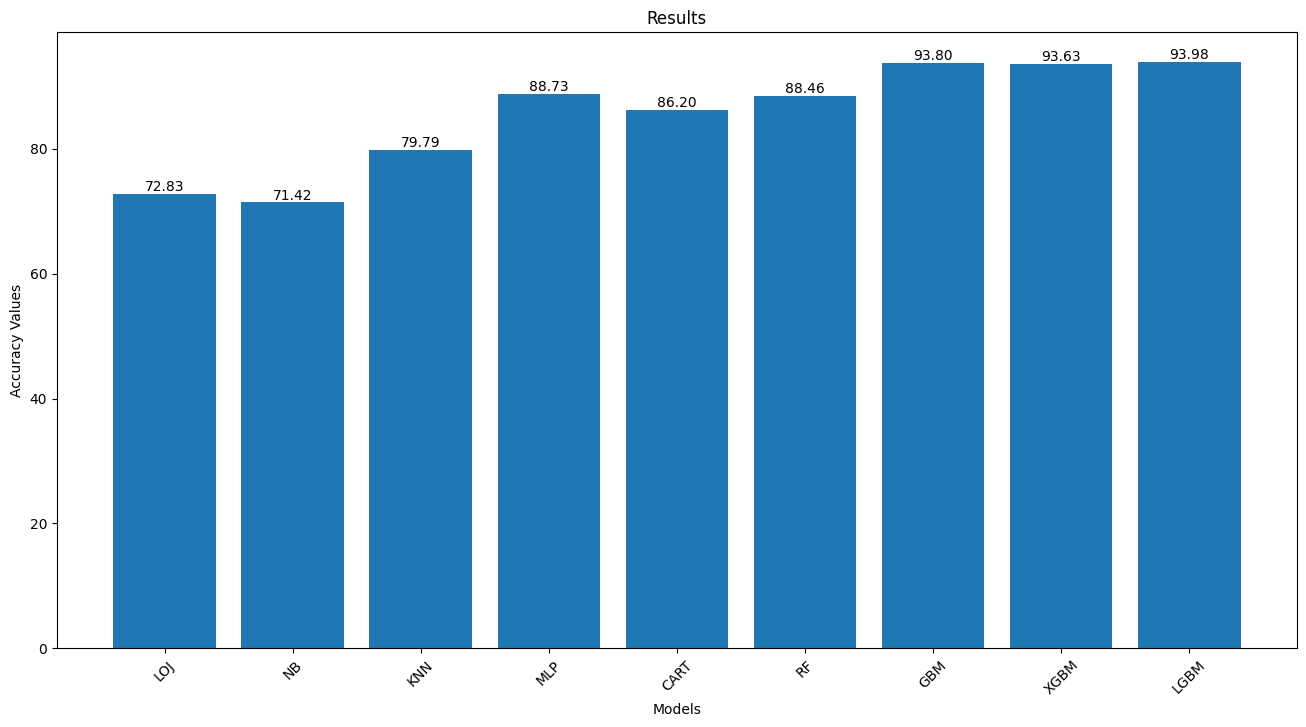

In [128]:
plt.figure(figsize=(16, 8))

plt.bar(result['Model'], result['Accuracy'])
plt.xlabel('Models')
plt.ylabel('Accuracy Values')
plt.title('Results')

for i, acc in enumerate(result['Accuracy']):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


In [129]:
# I created data frame called result_f1. This data frame include accuracy score of all used models.

result_f1 = {'Model': ['LOJ', 'NB', 'KNN', 'MLP', 'CART',  'RF', 'GBM', 'XGBM', 'LGBM'],
        'F1': np.array([loj_model_f1, nb_model_f1, knn_tuned_f1, 
                     mlp_tuned_f1, cart_tuned_f1, rf_tuned_f1, 
                     gbm_tuned_f1, xgbm_tuned_f1, lgbm_tuned_f1])*100}

result_f1 = pd.DataFrame(result_f1)
result_f1

,Model,F1
0,LOJ,54.638647
1,NB,52.084406
2,KNN,57.030995
3,MLP,73.990078
4,CART,70.202188
5,RF,74.158076
6,GBM,84.449577
7,XGBM,83.995372
8,LGBM,84.770785


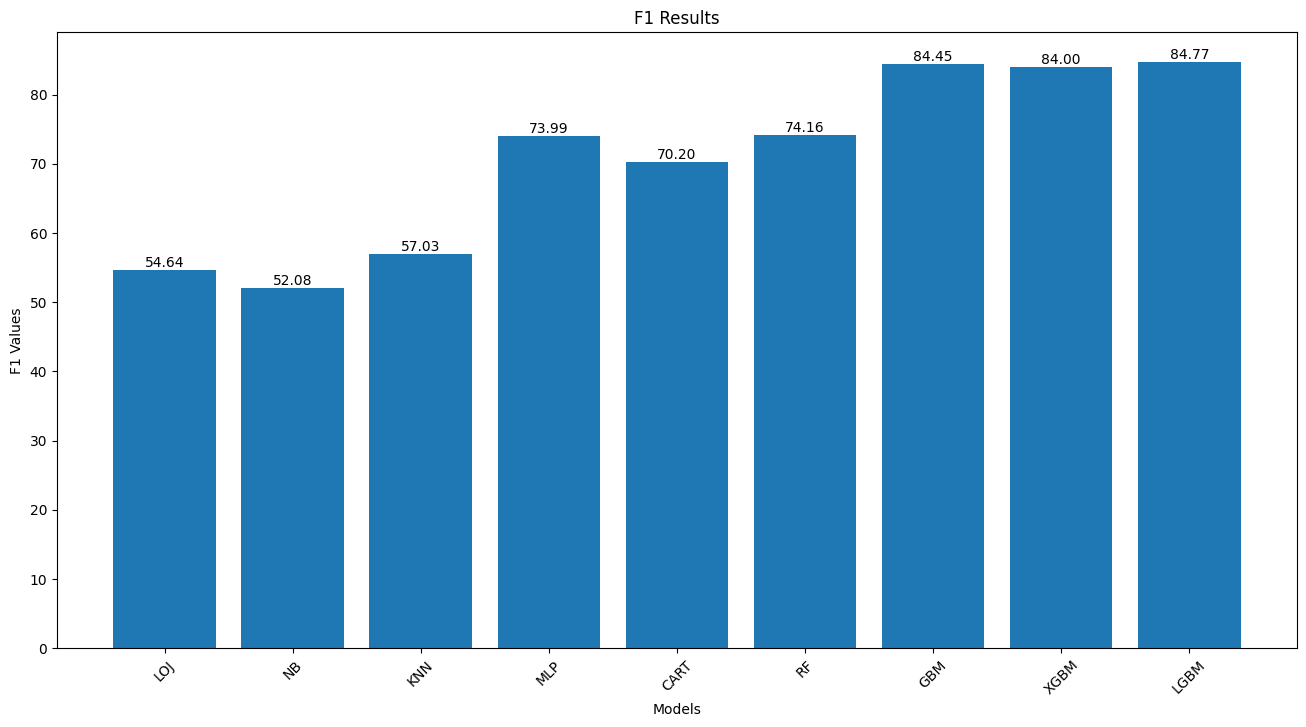

In [131]:
plt.figure(figsize=(16, 8))

plt.bar(result_f1['Model'], result_f1['F1'])
plt.xlabel('Models')
plt.ylabel('F1 Values')
plt.title('F1 Results')

for i, acc in enumerate(result_f1['F1']):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

F1 score and accuracy score results are shown in the graph and data frame above. Additionally, I also evaluated confusion matrices(TP , TN , FP , FN). Finally I decided the best model is GBM model.

In [132]:
from joblib import dump, load

# Save model
dump(gbm_tuned, 'predict_model_v2.joblib')


['predict_model_v2.joblib']